# Loading data

In [2]:
'''
This script analyzes the results of stimulated eye movements.
Author: Jonathan Gant
Date: 13.06.2025
'''

import numpy as np
import h5py
import matplotlib.pyplot as plt
import bottleneck as bn


In [3]:
all_gabor_responses_eye_movements = h5py.File('../results/new_nat_videos_gabor_responses_full_res_more_low_freq_z_score_eye_movements.h5', 'r')
all_gabor_responses_eye_movements_long = h5py.File('../results/new_nat_videos_gabor_responses_full_res_more_low_freq_z_score_eye_movements_2s_interval_stat_only.h5', 'r')

# Compute SD

In [4]:
import bottleneck as bn

environments = ['field', 'forest', 'orchard', 'tall_grass', 'pond']

stationary_stim_eye_movements_SD = []
moving_stim_eye_movements_SD = []
stationary_stim_eye_movements = []
moving_stim_eye_movements = []
stationary_stim_eye_movements_long_SD = []
stationary_stim_eye_movements_long = []

fps = 30
window_length = np.array([5]) # seconds
window_size = window_length * fps
print(window_size)
num_samples = 1740

# get the responses for each environment
for i in range(len(window_size)):
    stationary_stim_eye_movements_SD_temp = []
    moving_stim_eye_movements_SD_temp = []
    stationary_stim_eye_movements_temp = []
    moving_stim_eye_movements_temp = []
    stationary_stim_eye_movements_long_SD_temp = []
    stationary_stim_eye_movements_long_temp = []
    for env_key in environments:
        all_gabor_responses_env_eye_movements = all_gabor_responses_eye_movements[env_key]
        all_gabor_responses_env_eye_movements_long = all_gabor_responses_eye_movements_long[env_key]
        for vid_key in all_gabor_responses_env_eye_movements.keys():
            # compute the moving SD
            resp_SD = bn.move_std(all_gabor_responses_env_eye_movements[vid_key][()], window=window_size[i], min_count=window_size[i], axis=-1)[:, :, :, :, :num_samples]
            if 'stationary' in vid_key:
                stationary_stim_eye_movements_SD_temp.append(resp_SD)
                stationary_stim_eye_movements_temp.append(all_gabor_responses_env_eye_movements[vid_key][()][:, :, :, :, :num_samples])
            if 'moving' in vid_key and 'free_moving' not in vid_key:
                moving_stim_eye_movements_SD_temp.append(resp_SD)
                moving_stim_eye_movements_temp.append(all_gabor_responses_env_eye_movements[vid_key][()][:, :, :, :, :num_samples])
        for vid_key in all_gabor_responses_env_eye_movements_long.keys():
            # compute the moving SD
            resp_SD = bn.move_std(all_gabor_responses_env_eye_movements_long[vid_key][()], window=window_size[i], min_count=window_size[i], axis=-1)[:, :, :, :, :num_samples]
            if 'stationary' in vid_key:
                stationary_stim_eye_movements_long_SD_temp.append(resp_SD)
                stationary_stim_eye_movements_long_temp.append(all_gabor_responses_env_eye_movements_long[vid_key][()][:, :, :, :, :num_samples])
    stationary_stim_eye_movements_SD.append(stationary_stim_eye_movements_SD_temp)
    moving_stim_eye_movements_SD.append(moving_stim_eye_movements_SD_temp)
    stationary_stim_eye_movements.append(stationary_stim_eye_movements_temp)
    moving_stim_eye_movements.append(moving_stim_eye_movements_temp)
    stationary_stim_eye_movements_long_SD.append(stationary_stim_eye_movements_long_SD_temp)
    stationary_stim_eye_movements_long.append(stationary_stim_eye_movements_long_temp)

[150]


In [7]:
# convert everything to numpy arrays
stationary_stim_eye_movements_SD = np.array(stationary_stim_eye_movements_SD)
moving_stim_eye_movements_SD = np.array(moving_stim_eye_movements_SD)
stationary_stim_eye_movements_long_SD = np.array(stationary_stim_eye_movements_long_SD)
stationary_stim_eye_movements = np.array(stationary_stim_eye_movements)
moving_stim_eye_movements = np.array(moving_stim_eye_movements)
stationary_stim_eye_movements_long = np.array(stationary_stim_eye_movements_long)

In [16]:
all_gabor_responses_eye_movements_long['freq_arr'][()]

array([0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12])

In [17]:
mean_SD_moving_stim_eye_movements = np.nanmean(moving_stim_eye_movements_SD, axis=(0, 1, -1))
mean_SD_stationary_stim_eye_movements = np.nanmean(stationary_stim_eye_movements_SD, axis=(0, 1, -1))
mean_SD_stationary_stim_eye_movements_long = np.nanmean(stationary_stim_eye_movements_long_SD, axis=(0, 1, -1))

In [6]:
plt.figure(figsize=(8, 6))
plt.bar([1, 2], [np.nanmean(mean_SD_stationary_stim_eye_movements), np.nanmean(mean_SD_moving_stim_eye_movements)], yerr=[np.nanstd(mean_SD_stationary_stim_eye_movements), np.nanstd(mean_SD_moving_stim_eye_movements)], color=['tab:gray', 'tab:orange'], capsize=5, width=0.5)
plt.xticks([1, 2], ['Stationary', 'Moving'])
plt.ylabel('Mean SD of Gabor responses')
plt.xlim(0.5, 2.5)
plt.ylim(0, 70)
plt.title('Mean SD of Gabor responses for stationary and moving stimuli with eye movements')
plt.savefig('../manuscript_figures/supp1_mean_SD_gabor_responses_eye_movements.pdf', bbox_inches='tight')
plt.show()

NameError: name 'mean_SD_stationary_stim_eye_movements' is not defined

<Figure size 800x600 with 0 Axes>

In [45]:
# print the mean and SD
print('Mean SD of stationary stimuli with eye movements:', np.nanmean(mean_SD_stationary_stim_eye_movements), '±', np.nanstd(mean_SD_stationary_stim_eye_movements))
print('Mean SD of moving stimuli with eye movements:', np.nanmean(mean_SD_moving_stim_eye_movements), '±', np.nanstd(mean_SD_moving_stim_eye_movements))

Mean SD of stationary stimuli with eye movements: 36.861628206205516 ± 10.008830728344005
Mean SD of moving stimuli with eye movements: 48.23423940032332 ± 17.101536717615925


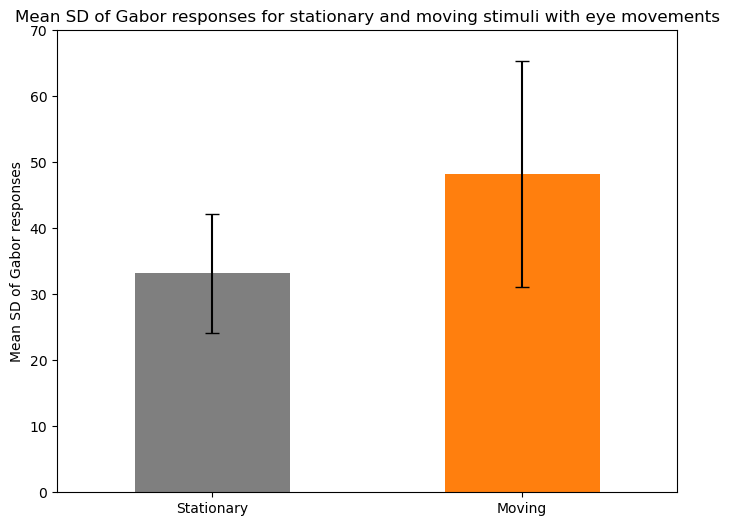

In [18]:
plt.figure(figsize=(8, 6))
plt.bar([1, 2], [np.nanmean(mean_SD_stationary_stim_eye_movements_long), np.nanmean(mean_SD_moving_stim_eye_movements)], yerr=[np.nanstd(mean_SD_stationary_stim_eye_movements_long), np.nanstd(mean_SD_moving_stim_eye_movements)], color=['tab:gray', 'tab:orange'], capsize=5, width=0.5)
plt.xticks([1, 2], ['Stationary', 'Moving'])
plt.ylabel('Mean SD of Gabor responses')
plt.xlim(0.5, 2.5)
plt.ylim(0, 70)
plt.title('Mean SD of Gabor responses for stationary and moving stimuli with eye movements')
plt.savefig('../manuscript_figures/supp1_mean_SD_gabor_responses_eye_movements.pdf', bbox_inches='tight')
plt.show()

In [19]:
# print the mean and SD
print('Mean SD of stationary stimuli with eye movements:', np.nanmean(mean_SD_stationary_stim_eye_movements_long), '±', np.nanstd(mean_SD_stationary_stim_eye_movements_long))
print('Mean SD of moving stimuli with eye movements:', np.nanmean(mean_SD_moving_stim_eye_movements), '±', np.nanstd(mean_SD_moving_stim_eye_movements))

Mean SD of stationary stimuli with eye movements: 33.163940203338925 ± 9.027396541342537
Mean SD of moving stimuli with eye movements: 48.23423940032332 ± 17.101536717615925


In [25]:
# also compute the ratio of the means
ratio_mean_SD = mean_SD_moving_stim_eye_movements/mean_SD_stationary_stim_eye_movements_long
avg_ratio_mean_SD = np.nanmean(ratio_mean_SD)
std_ratio_mean_SD = np.nanstd(ratio_mean_SD)

print('Ratio of means:', avg_ratio_mean_SD, '±', std_ratio_mean_SD)

Ratio of means: 1.4350535381443532 ± 0.228051152760187


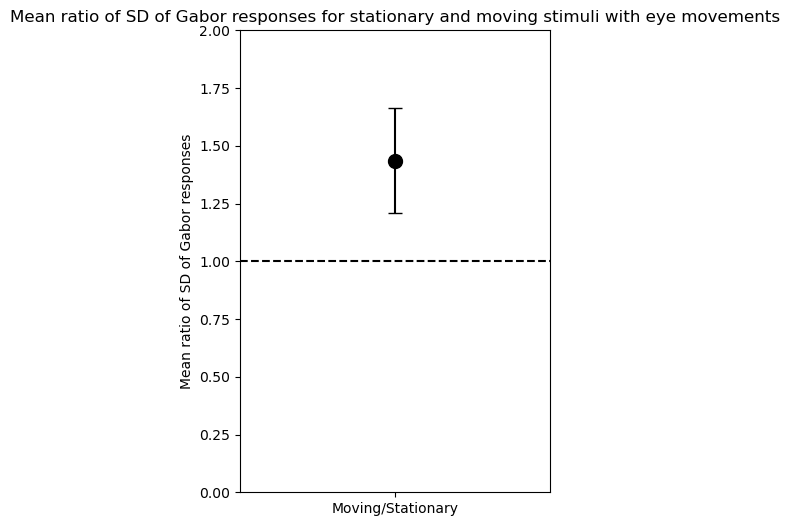

In [33]:
plt.figure(figsize=(4, 6))
# plt.scatter([1], avg_ratio_mean_SD, yerr=std_ratio_mean_SD, color='k', capsize=5)
plt.scatter([1], avg_ratio_mean_SD, color='k', s=100)  # Add a point for the mean
# plot the SD as an error bar
plt.errorbar([1], avg_ratio_mean_SD, yerr=std_ratio_mean_SD, color='k', capsize=5)
plt.xticks([1], ['Moving/Stationary'])
plt.ylabel('Mean ratio of SD of Gabor responses')
# add a horizontal line at 1
plt.axhline(1, color='k', linestyle='--')
plt.xlim(0.5, 1.5)
plt.ylim(0, 2)
plt.title('Mean ratio of SD of Gabor responses for stationary and moving stimuli with eye movements')
plt.savefig('../manuscript_figures/supp1_mean_ratio_SD_gabor_responses_eye_movements.pdf', bbox_inches='tight')
plt.show()

In [20]:
# use a paired t-test to compare the means of the two conditions
from scipy.stats import ttest_rel
t_stat, p_val = ttest_rel(mean_SD_moving_stim_eye_movements.flatten(), mean_SD_stationary_stim_eye_movements_long.flatten(), nan_policy='omit')
if p_val < 0.001:
    print('p_val:', p_val)
    print('t-statistic:', t_stat)
    print("The means are significantly different.")

p_val: 0.0
t-statistic: 81.26534783736729
The means are significantly different.


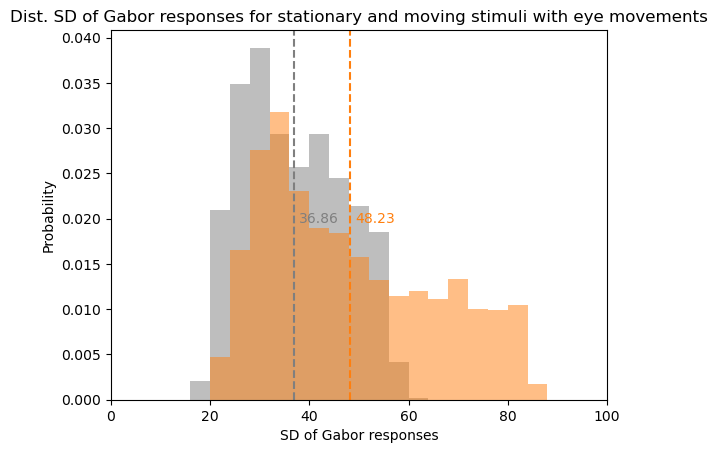

In [31]:
bins = np.linspace(0, 100, 26)

plt.hist(mean_SD_stationary_stim_eye_movements.flatten(), bins=bins, alpha=0.5, color='tab:gray',density=True)
plt.hist(mean_SD_moving_stim_eye_movements.flatten(), bins=bins, alpha=0.5, color='tab:orange',density=True)
plt.ylabel('Probability')
plt.xlabel('SD of Gabor responses')
# plot the mean as a vertical line
plt.axvline(np.nanmean(mean_SD_stationary_stim_eye_movements), color='tab:gray', linestyle='--', label='Mean Stationary')
plt.axvline(np.nanmean(mean_SD_moving_stim_eye_movements), color='tab:orange', linestyle='--', label='Mean Moving')
# also print the numerical value of the mean near the line
plt.text(np.nanmean(mean_SD_stationary_stim_eye_movements) + 1,
         0.02,
         f'{np.nanmean(mean_SD_stationary_stim_eye_movements):.2f}',
         color='tab:gray',
         fontsize=10,
         verticalalignment='center')
plt.text(np.nanmean(mean_SD_moving_stim_eye_movements) + 1,
         0.02,
         f'{np.nanmean(mean_SD_moving_stim_eye_movements):.2f}',
         color='tab:orange',
         fontsize=10,
         verticalalignment='center')
plt.xlim(0, 100)
# plt.yscale('log')
plt.title('Dist. SD of Gabor responses for stationary and moving stimuli with eye movements')
plt.savefig('../manuscript_figures/supp1_SD_distribution_gabor_responses_eye_movements.pdf', bbox_inches='tight')
plt.show()

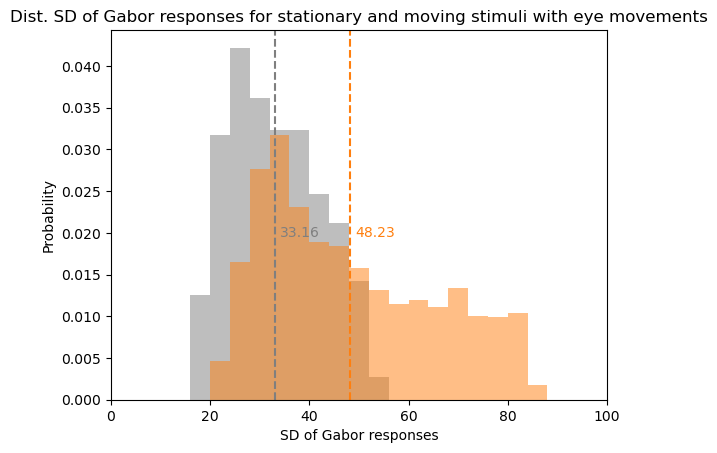

In [21]:
bins = np.linspace(0, 100, 26)

plt.hist(mean_SD_stationary_stim_eye_movements_long.flatten(), bins=bins, alpha=0.5, color='tab:gray',density=True)
plt.hist(mean_SD_moving_stim_eye_movements.flatten(), bins=bins, alpha=0.5, color='tab:orange',density=True)
plt.ylabel('Probability')
plt.xlabel('SD of Gabor responses')
# plot the mean as a vertical line
plt.axvline(np.nanmean(mean_SD_stationary_stim_eye_movements_long), color='tab:gray', linestyle='--', label='Mean Stationary')
plt.axvline(np.nanmean(mean_SD_moving_stim_eye_movements), color='tab:orange', linestyle='--', label='Mean Moving')
# also print the numerical value of the mean near the line
plt.text(np.nanmean(mean_SD_stationary_stim_eye_movements_long) + 1,
         0.02,
         f'{np.nanmean(mean_SD_stationary_stim_eye_movements_long):.2f}',
         color='tab:gray',
         fontsize=10,
         verticalalignment='center')
plt.text(np.nanmean(mean_SD_moving_stim_eye_movements) + 1,
         0.02,
         f'{np.nanmean(mean_SD_moving_stim_eye_movements):.2f}',
         color='tab:orange',
         fontsize=10,
         verticalalignment='center')
plt.xlim(0, 100)
# plt.yscale('log')
plt.title('Dist. SD of Gabor responses for stationary and moving stimuli with eye movements')
plt.savefig('../manuscript_figures/supp1_SD_distribution_gabor_responses_eye_movements.pdf', bbox_inches='tight')
plt.show()

# Spectrum

In [22]:
# compute the spectrum of the individual filters
from scipy.signal import welch

def compute_psd_welch(x, fs, window_size, overlap):
    """
    Compute one-sided PSD using Welch's method for a real-valued signal with variable window size and full overlap.

    Parameters:
    - x: 1D real-valued input signal
    - fs: sampling frequency (Hz)
    - window_size: length of each segment (samples)

    Returns:
    - freqs: frequency bins (Hz)
    - psd: power spectral density (power/Hz)
    """
    freqs, psd = welch(
        x,
        fs=fs,
        window='boxcar',
        nperseg=window_size,
        noverlap=overlap,  # full overlap
        return_onesided=True,
        scaling='density',
        detrend='constant'
    )
    return freqs, psd

In [23]:
stationary_stim_eye_movements.shape

(1, 50, 8, 4, 10, 9, 1740)

In [24]:
# compute the fourier transform for each filter and video using scipy

sampling_rate = 30
window_size = int(5 * sampling_rate)  # 5 seconds window size

shape = stationary_stim_eye_movements.shape

stationary_stim_psd = np.zeros((shape[1], shape[2], shape[3], shape[4], shape[5], window_size//2+1))
moving_stim_psd = np.zeros((shape[1], shape[2], shape[3], shape[4], shape[5], window_size//2+1))
for i in range(shape[1]):
    _, stationary_stim_psd[i] = compute_psd_welch(stationary_stim_eye_movements_long[0, i], sampling_rate, window_size, window_size//2)
    frequencies, moving_stim_psd[i] = compute_psd_welch(moving_stim_eye_movements[0, i], sampling_rate, window_size, window_size//2)

In [34]:
# compute the average spectra
stationary_stim_psd_mean = np.nanmean(stationary_stim_psd, axis=(0, 1, 2, 3, 4))
moving_stim_psd_mean = np.nanmean(moving_stim_psd, axis=(0, 1, 2, 3, 4))

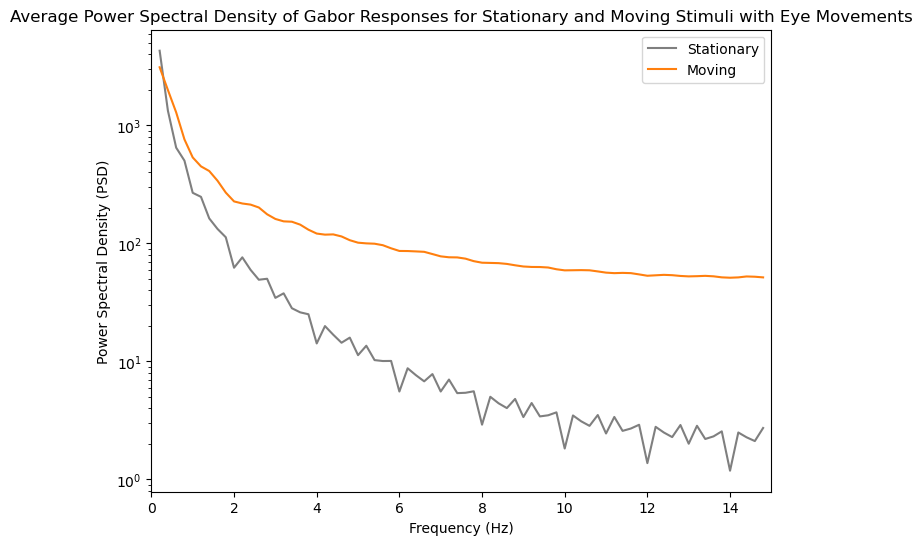

In [35]:
# plot the average spectra
plt.figure(figsize=(8, 6))
plt.plot(frequencies[1:-1], stationary_stim_psd_mean[1:-1], label='Stationary', color='tab:gray')
plt.plot(frequencies[1:-1], moving_stim_psd_mean[1:-1], label='Moving', color='tab:orange')
# plot the SD as fill between
# plt.fill_between(frequencies[1:-1], np.clip(stationary_stim_psd_mean[1:-1] - np.nanstd(stationary_stim_psd, axis=(0, 1, 2, 3, 4))[1:-1], 1, np.inf),
#                  stationary_stim_psd_mean[1:-1] + np.nanstd(stationary_stim_psd, axis=(0, 1, 2, 3, 4))[1:-1], color='tab:gray', alpha=0.2)
# plt.fill_between(frequencies[1:-1], np.clip(moving_stim_psd_mean[1:-1] - np.nanstd(moving_stim_psd, axis=(0, 1, 2, 3, 4))[1:-1], 1, np.inf),
#                  moving_stim_psd_mean[1:-1] + np.nanstd(moving_stim_psd, axis=(0, 1, 2, 3, 4))[1:-1], color='tab:orange', alpha=0.2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.yscale('log')
plt.xlim(0, 15)
plt.title('Average Power Spectral Density of Gabor Responses for Stationary and Moving Stimuli with Eye Movements')
plt.legend()
plt.savefig('../manuscript_figures/supp1_average_psd_gabor_responses_eye_movements.pdf', bbox_inches='tight')
plt.show()

In [40]:
stat_energy = np.cumsum(stationary_stim_psd_mean)
moving_energy = np.cumsum(moving_stim_psd_mean)

# normalize by the max stat energy
norm_factor = np.max(stat_energy)
stat_energy /= norm_factor
moving_energy /= norm_factor

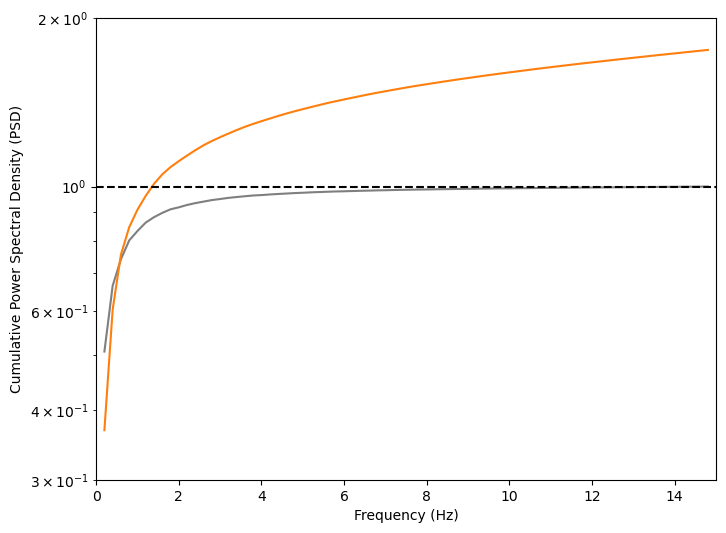

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(frequencies[1:-1], stat_energy[1:-1], label='Stationary', color='tab:gray')
plt.plot(frequencies[1:-1], moving_energy[1:-1], label='Moving', color='tab:orange')
# plot a line at y=1
plt.axhline(1, color='k', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.xlim(0, 15)
plt.ylim(.3, 2)
plt.yscale('log')
plt.ylabel('Cumulative Power Spectral Density (PSD)')
plt.savefig('../manuscript_figures/supp1_cumulative_psd_gabor_responses_eye_movements.pdf', bbox_inches='tight')

# Correlations

In [14]:
stationary_stim_eye_movements.shape

(1, 50, 8, 4, 10, 9, 1740)

In [15]:
# compute the windowed correlations between pairs of filters
# chunk the data into windows of 5 seconds
# compute the correlations between all pairs of filters in each window


# stationary_stim_eye_movements.shape
window_length = 5  # seconds
window_size = window_length * fps
num_windows = stationary_stim_eye_movements.shape[-1] // window_size
print(num_windows)
# chunk the data into windows
stationary_stim_eye_movements_windows = np.array(np.split(stationary_stim_eye_movements[0, :, :, :, :, :, :num_windows * window_size], num_windows, axis=-1))
moving_stim_eye_movements_windows = np.array(np.split(moving_stim_eye_movements[0, :, :, :, :, :, :num_windows * window_size], num_windows, axis=-1))

11


In [16]:
stationary_stim_eye_movements_windows.shape
# merge the first and second dimensions together and the thrid, fourth, fifth and sixth dimensions together without using reshape
stationary_stim_eye_movements_windows = stationary_stim_eye_movements_windows.reshape(
    stationary_stim_eye_movements_windows.shape[0] * stationary_stim_eye_movements_windows.shape[1],
    stationary_stim_eye_movements_windows.shape[2] * stationary_stim_eye_movements_windows.shape[3] * stationary_stim_eye_movements_windows.shape[4] * stationary_stim_eye_movements_windows.shape[5],
    stationary_stim_eye_movements_windows.shape[6]
)
moving_stim_eye_movements_windows = moving_stim_eye_movements_windows.reshape(
    moving_stim_eye_movements_windows.shape[0] * moving_stim_eye_movements_windows.shape[1],
    moving_stim_eye_movements_windows.shape[2] * moving_stim_eye_movements_windows.shape[3] * moving_stim_eye_movements_windows.shape[4] * moving_stim_eye_movements_windows.shape[5],
    moving_stim_eye_movements_windows.shape[6]
)

In [17]:
from joblib import Parallel, delayed

def offdiag_corrs(window):
    corr = np.corrcoef(window)
    # Extract upper triangle, excluding the diagonal
    return corr[np.triu_indices_from(corr, k=1)]

# Number of unique filter pairs
n_filters = stationary_stim_eye_movements_windows.shape[1]
n_pairs = n_filters * (n_filters - 1) // 2

# Preallocate arrays for off-diagonal correlations
stationary_stim_eye_movements_corr = np.zeros((stationary_stim_eye_movements_windows.shape[0], n_pairs))
moving_stim_eye_movements_corr = np.zeros((moving_stim_eye_movements_windows.shape[0], n_pairs))

# Compute off-diagonal correlations in parallel
stationary_stim_eye_movements_corr = np.stack(
    Parallel(n_jobs=-1)(
        delayed(offdiag_corrs)(window) for window in stationary_stim_eye_movements_windows
    )
)
moving_stim_eye_movements_corr = np.stack(
    Parallel(n_jobs=-1)(
        delayed(offdiag_corrs)(window) for window in moving_stim_eye_movements_windows
    )
)

# save the correlations to a numpy file
np.save('../results/stationary_moving_stim_eye_movements_corrs.npy', stationary_stim_eye_movements_corr)
np.save('../results/moving_stim_eye_movements_corrs.npy', moving_stim_eye_movements_corr)

/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/gant/miniconda3/envs/lococoding/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid v

In [18]:
stationary_stim_eye_movements_corr.shape

(550, 4145760)

In [20]:
# compute the average correlation
avg_corr_stationary = np.nanmean(np.abs(stationary_stim_eye_movements_corr))
avg_corr_moving = np.nanmean(np.abs(moving_stim_eye_movements_corr))

In [23]:
print(avg_corr_stationary)

0.3352240158460184


In [22]:
print(avg_corr_moving)

0.19740906414699486
